<a href="https://colab.research.google.com/github/KongpobI/House-price-predict/blob/main/HousePrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction (Linear Regression)

## Installing Packages

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from pandas import set_option
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 10]

In [ ]:
!wget -N https://www.dropbox.com/s/3pzyqphvbp6xa5e/housing.csv

--2023-10-30 15:40:14--  https://www.dropbox.com/s/3pzyqphvbp6xa5e/housing.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3pzyqphvbp6xa5e/housing.csv [following]
--2023-10-30 15:40:14--  https://www.dropbox.com/s/raw/3pzyqphvbp6xa5e/housing.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3ada3058521c888011ae05fdc2.dl.dropboxusercontent.com/cd/0/inline/CGnPLKL32nrR2Nc9mvPtrTURVrY7x966pjsTOdkHH5Ui5Xn6vCgEa66TLj5IYzJg5EcJLObh8OWasA9xlRhR6PWQ1mZ_evjUMkrEl4Utxr5lodAKtCzeQg8jQPwTJ2dDnJw/file# [following]
--2023-10-30 15:40:16--  https://uc3ada3058521c888011ae05fdc2.dl.dropboxusercontent.com/cd/0/inline/CGnPLKL32nrR2Nc9mvPtrTURVrY7x966pjsTOdkHH5Ui5Xn6vCgEa66TLj5IYzJg5EcJLObh8OWasA9xlRhR6PWQ1mZ_evjUMkrEl4Utxr5lodAKtCzeQg8jQPw

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
bos1 = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

Boston House Price dataset has 14 features and their description is given as follows:

- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per dollar 10,000.

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000's


In [ ]:
# data frame with first 5 rows (by default)
bos1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# dimension
bos1.shape

(506, 14)

In [ ]:
bos1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# correlation

bos1.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


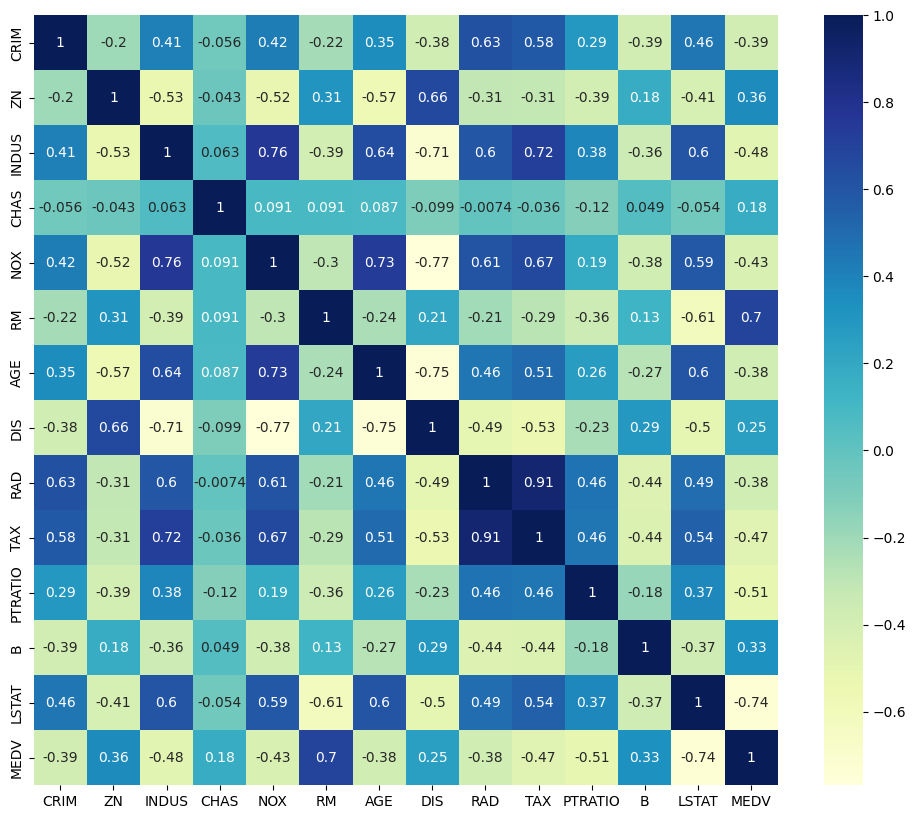

In [ ]:
plt.figure(figsize=(12,10))
cor = bos1.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])

#Selecting highly correlated features (>0.5)
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

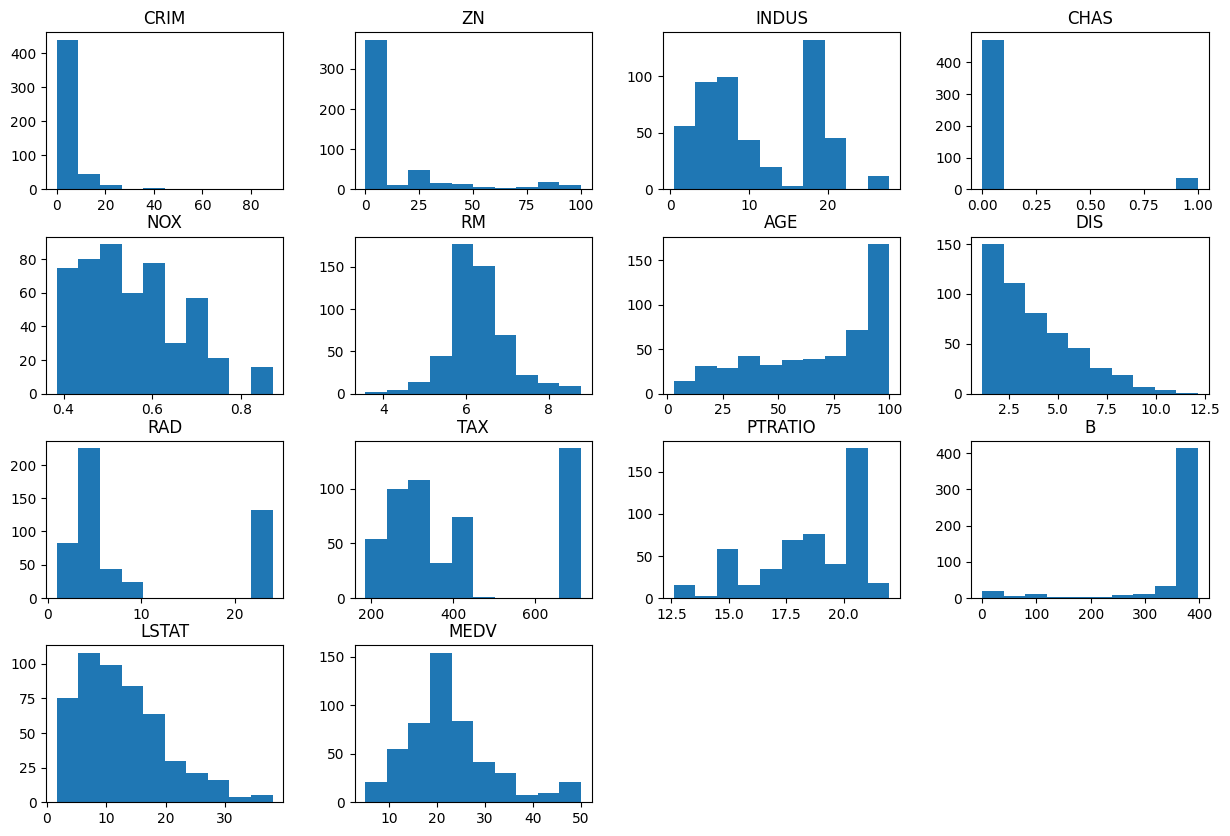

In [ ]:
# Data visualizations
# histograms
bos1.hist(bins=10,figsize=(15,10),grid=False);

<ipython-input-122-00deabf72fe0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bos1['MEDV'], hist=True);


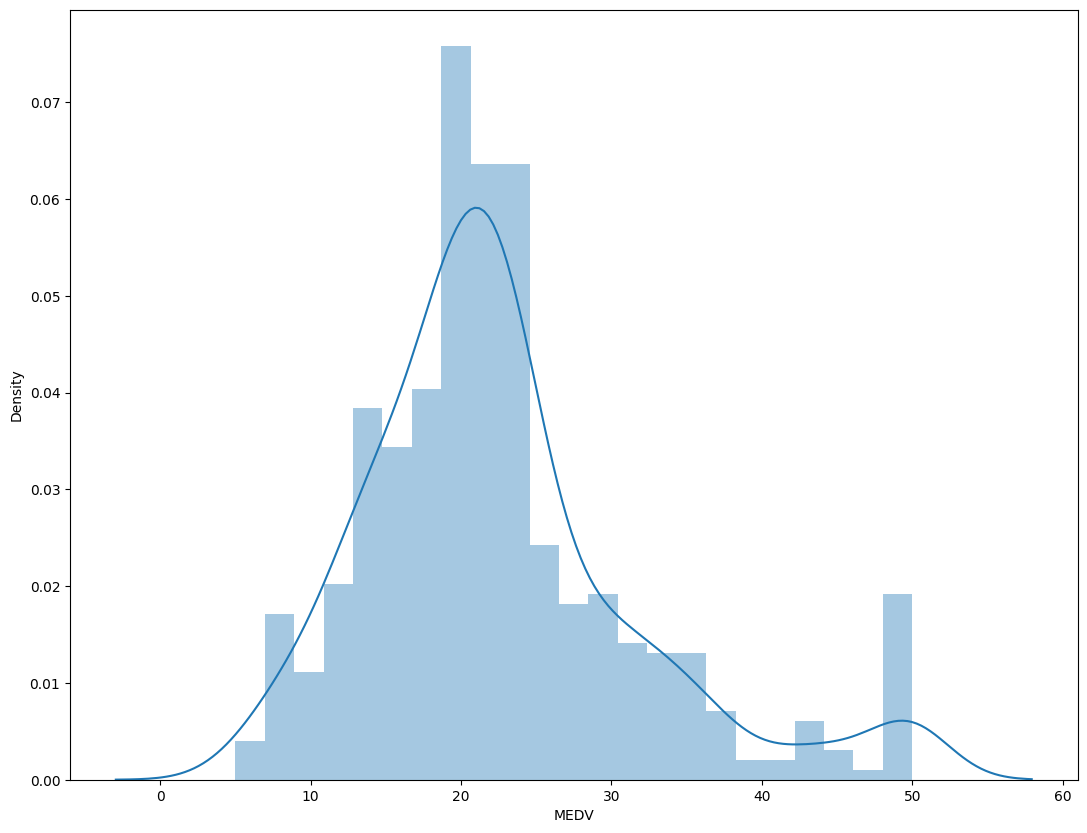

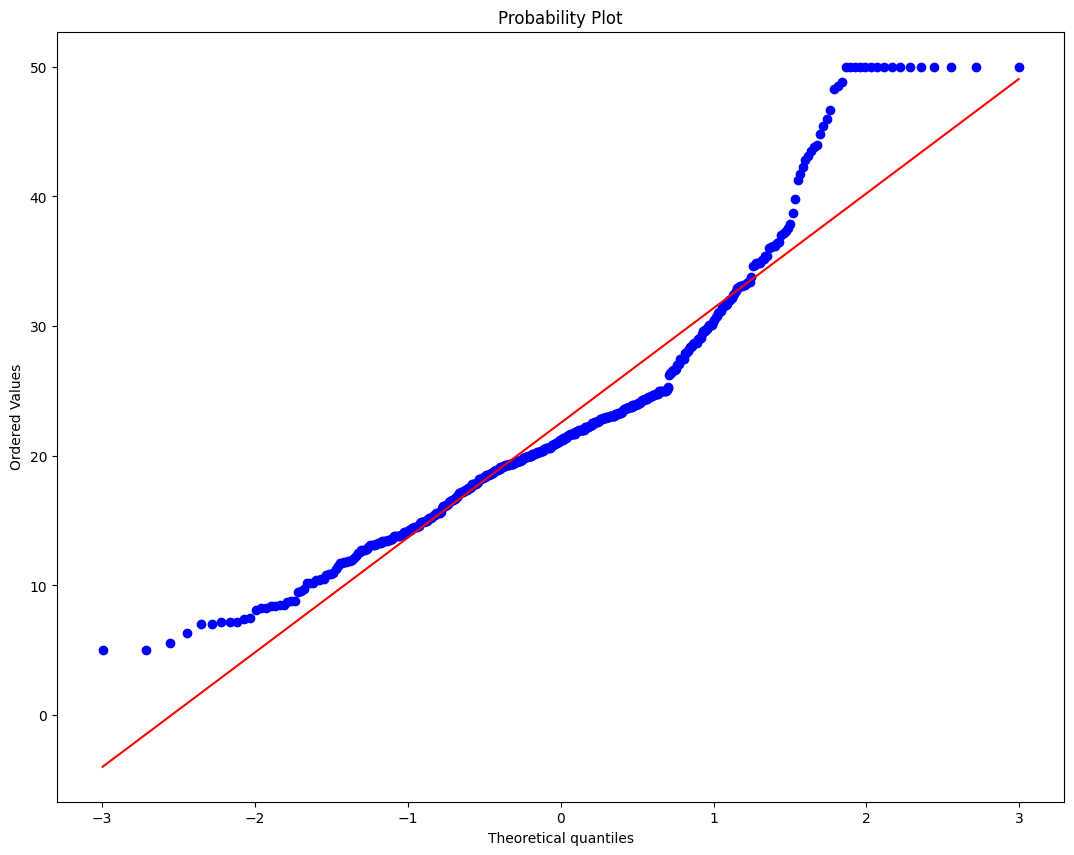

In [ ]:
from scipy import stats
#histogram and normal probability plot
sns.distplot(bos1['MEDV'], hist=True);
fig = plt.figure()
res = stats.probplot(bos1['MEDV'], plot=plt)


---
จะเห็นว่าtarget ยังคงมีความเป็นnormal distribution ไม่ได้เบ้ขวาจนน่าเกลียด


In [ ]:
#simple linear regression
x = bos1["LSTAT"]
y = y = bos1["MEDV"]
print(x.shape)
print(y.shape)

(506,)
(506,)


In [ ]:
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.33, random_state=5)

In [ ]:
lr = LinearRegression()
model1 = lr.fit(np.array(x_train).reshape(-1, 1),y_train)

In [ ]:
print("b:",model1.intercept_)
print("a:",model1.coef_[0])
print("Eqs. : y =",str(model1.intercept_)+"*X +",model1.coef_[0])

b: 34.27697327820751
a: -0.9375074065299931
Eqs. : y = 34.27697327820751*X + -0.9375074065299931


In [ ]:
y_pred1 = model1.predict(np.array(x_test).reshape(-1,1))

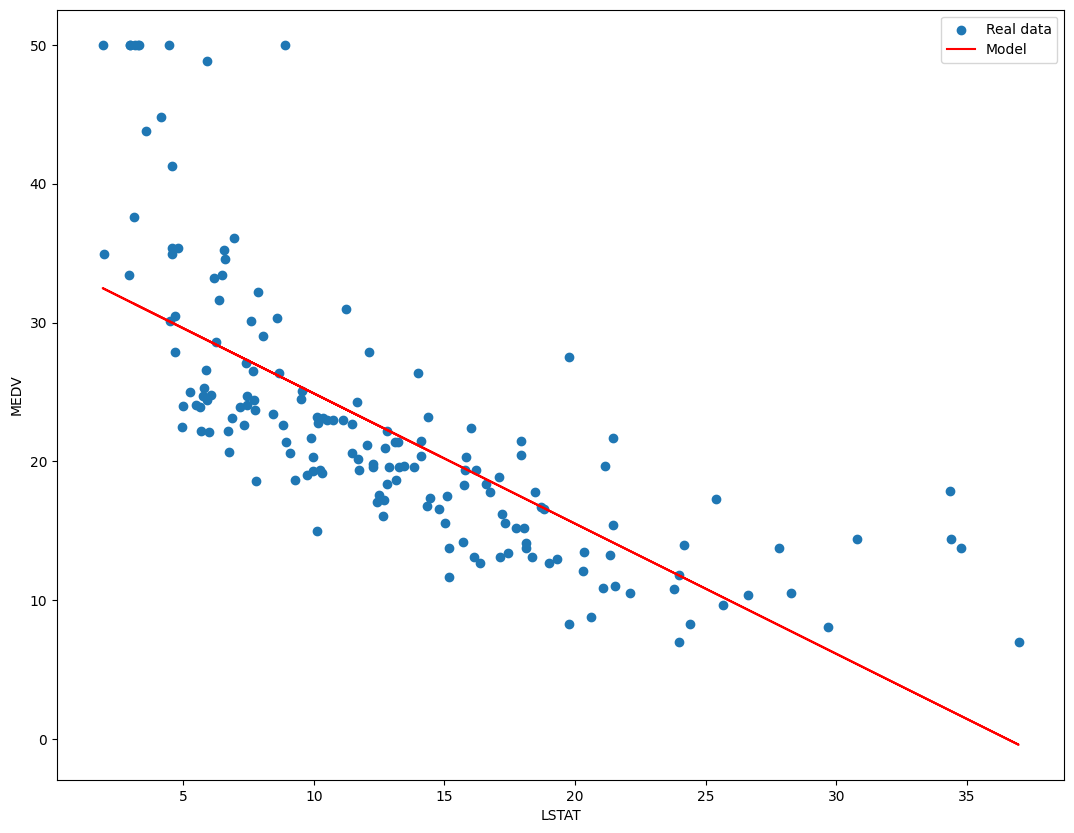

In [ ]:
plt.scatter(x_test,y_test, label = "Real data")
plt.plot(x_test,y_pred1, label = "Model", color = "r")

plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.legend()
plt.show()

In [ ]:
# calculate MSE
import math
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, y_pred1)
print("RMSE :",math.sqrt(mse))
# print(y_test.mean())

# R^2
print( " R^2 :",model1.score(pd.DataFrame(x_test),y_test) )

RMSE : 6.591823242371571
 R^2 : 0.536480204168287


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ปรับปรุงmodel โดยเพิ่มตัวแปร (Multiple Linear Regression)


---



In [ ]:
# variable selection
x = bos1.drop(columns=['MEDV'])
x = x[['RM',"PTRATIO","LSTAT"]]
y = bos1["MEDV"]
print(x.shape)
print(y.shape)

(506, 3)
(506,)


In [ ]:
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.33, random_state=5)

In [ ]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [ ]:
print(x.columns)
print("c :",model.intercept_)
print("b1,b2,b3 :",model.coef_)

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')
c : 22.929119574306025
b1,b2,b3 : [ 4.21798734 -1.07042016 -0.57236016]




---


three inputs

*   RM(x1)
*   PTRATIO(x2)
*   LSTAT(x3)

Eqs.

*   y = 4.21798734(x1) - 1.07042016(x2) - 0.57236016(x3) + 22.929119574306025









In [ ]:
y_pred = model.predict(x_test)

In [ ]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred}).head()

,Actual,Predict
226,37.6,36.424940
292,27.9,27.652216
90,22.6,25.899972
373,13.8,2.099115
273,35.2,31.693715


Text(0, 0.5, 'Predicted Y')

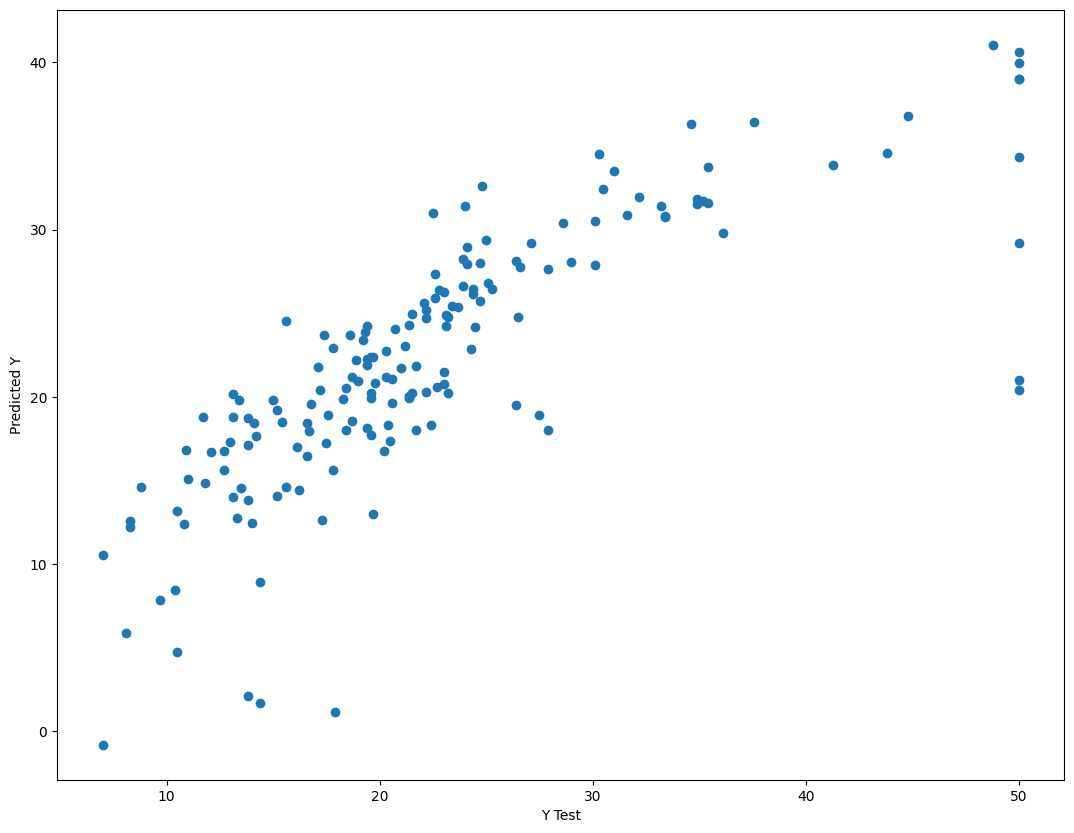

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
# calculate MSE
import math
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("RMSE :",math.sqrt(mse))
# print(y_test.mean())

# R^2
print( " R^2 :",model.score(x_test,y_test) )

RMSE : 5.811329091763358
 R^2 : 0.6397465739421644


In [ ]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred})

,Actual,Predict
226,37.6,36.424940
292,27.9,27.652216
90,22.6,25.899972
373,13.8,2.099115
273,35.2,31.693715
...,...,...
48,14.4,8.907096
281,35.4,33.743662
42,25.3,26.463950
115,18.3,19.859474
